In [6]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)
import matplotlib.pyplot as plt # to plot
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, GlobalAveragePooling1D
from tensorflow.keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
!pip install -q -U keras-tuner --upgrade
import keras
import keras_tuner as kt

from sklearn.metrics import classification_report

In [7]:
# Load the dataset
data = pd.read_csv('archives/Sentiment_Stock_data.csv')

# Display the first few rows of the dataset
print(data.head())

   ID  Sentiment                                           Sentence
0   0          0  According to Gran , the company has no plans t...
1   1          1  For the last quarter of 2010 , Componenta 's n...
2   2          1  In the third quarter of 2010 , net sales incre...
3   3          1  Operating profit rose to EUR 13.1 mn from EUR ...
4   4          1  Operating profit totalled EUR 21.1 mn , up fro...


In [8]:
# Separate features and labels
sentences = data['Sentence'].astype(str).values # Ensure all elements are strings
labels = data['Sentiment'].values

# Tokenize the sentences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Pad the sequences
max_length = max([len(x) for x in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Convert labels to numpy array
labels = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [9]:
# MLP model
# Define the MLP model
mlp_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the MLP model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the MLP model
mlp_history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


2719/2719 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.5249 - loss: 0.6893 - val_accuracy: 0.5449 - val_loss: 0.6763
Epoch 2/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.6065 - loss: 0.6338 - val_accuracy: 0.5374 - val_loss: 0.6993
Epoch 3/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7209 - loss: 0.4990 - val_accuracy: 0.5276 - val_loss: 0.8948
Epoch 4/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7891 - loss: 0.3940 - val_accuracy: 0.5277 - val_loss: 1.2024
Epoch 5/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.8366 - loss: 0.3168 - val_accuracy: 0.5288 - val_loss: 1.6198
Epoch 6/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.8768 - loss: 0.2480 - val_accuracy: 0.5258 - val_loss: 2.1522
Epoch 7/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9081 - loss: 0.1931 - val_accuracy: 0.5272 - val_loss: 2.6375
Epoch 8/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.9294 - loss: 0.1580 - va

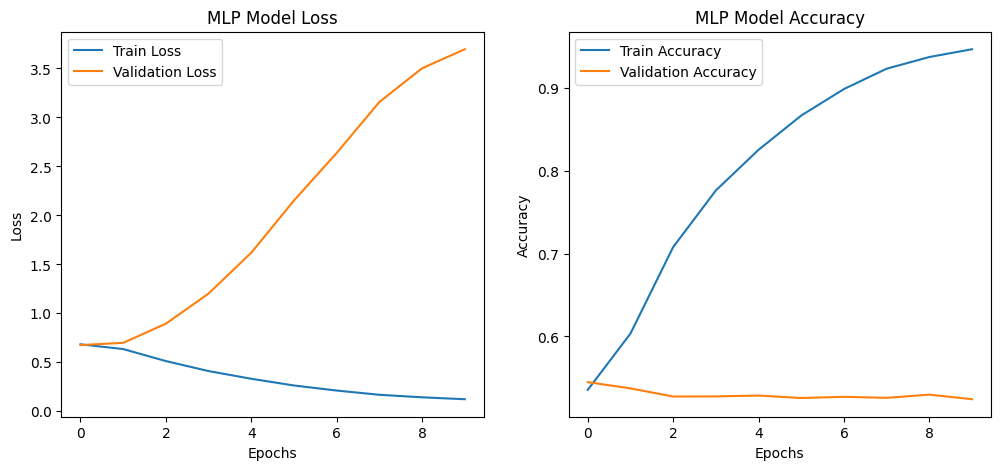

In [10]:
# Making graphs for the MLP model
# Plotting the loss and accuracy for MLP model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Train Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
# Define the CNN model
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(),
    Flatten(),  # Flatten the output before passing to Dense layers
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.5245 - loss: 0.6887 - val_accuracy: 0.5452 - val_loss: 0.6749
Epoch 2/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.5818 - loss: 0.6546 - val_accuracy: 0.5413 - val_loss: 0.6794
Epoch 3/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - accuracy: 0.6801 - loss: 0.5618 - val_accuracy: 0.5311 - val_loss: 0.7532
Epoch 4/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.7826 - loss: 0.4177 - val_accuracy: 0.5364 - val_loss: 1.0066
Epoch 5/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.8590 - loss: 0.2846 - val_accuracy: 0.5330 - val_loss: 1.4638
Epoch 6/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9025 - loss: 0.2056 - val_accuracy: 0.5303 - val_loss: 1.8259
Epoch 7/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9269 - loss: 0.1561 - val_accuracy: 0.5302 - val_loss: 2.2512
Epoch 8/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9391 - lo

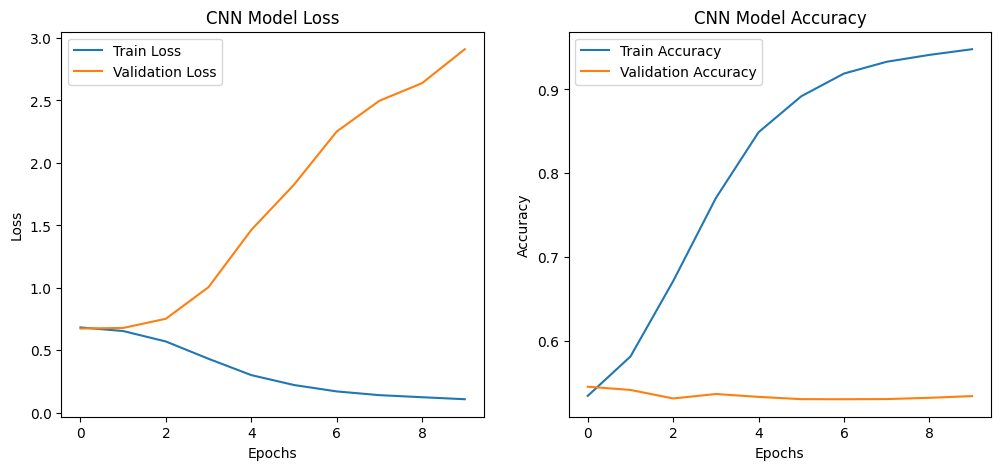

In [12]:
# Plotting the loss and accuracy for CNN model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show() 

In [13]:
# Define the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),
    LSTM(32, return_sequences=True),
    Dropout(0.25),
    LSTM(16, return_sequences=True),
    Dropout(0.25),
    LSTM(8),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 117s 41ms/step - accuracy: 0.5065 - loss: 0.6933 - val_accuracy: 0.5110 - val_loss: 0.6930
Epoch 2/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 104s 38ms/step - accuracy: 0.5114 - loss: 0.6930 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 3/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 117s 43ms/step - accuracy: 0.5084 - loss: 0.6930 - val_accuracy: 0.5110 - val_loss: 0.6930
Epoch 4/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 122s 45ms/step - accuracy: 0.5109 - loss: 0.6930 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 5/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 113s 42ms/step - accuracy: 0.5125 - loss: 0.6929 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 6/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 108s 40ms/step - accuracy: 0.5130 - loss: 0.6928 - val_accuracy: 0.5111 - val_loss: 0.6929
Epoch 7/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 102s 38ms/step - accuracy: 0.5133 - loss: 0.6928 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 8/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 115s 42ms/step - accuracy: 

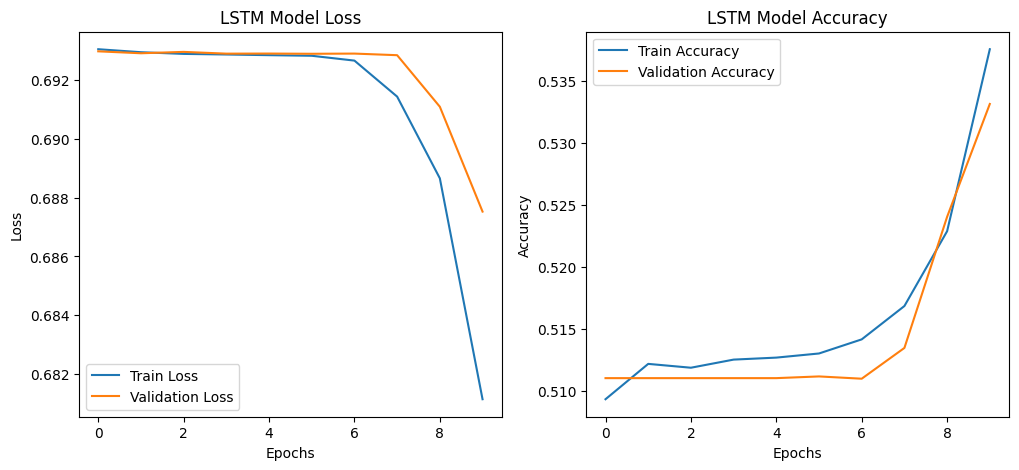

In [14]:
# Plotting the loss and accuracy for LSTM model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
# Evaluate the models
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)

print(f'MLP Model Accuracy: {mlp_accuracy}')
print(f'CNN Model Accuracy: {cnn_accuracy}')
print(f'LSTM Model Accuracy: {lstm_accuracy}')

# Generate classification reports
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype("int32")
y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype("int32")
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")

print("MLP Model Classification Report:")
print(classification_report(y_test, y_pred_mlp))

print("CNN Model Classification Report:")
print(classification_report(y_test, y_pred_cnn))

print("LSTM Model Classification Report:")
print(classification_report(y_test,y_pred_lstm))

680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5227 - loss: 3.6478
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5361 - loss: 2.8633
680/680 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5312 - loss: 0.6889
MLP Model Accuracy: 0.524343729019165
CNN Model Accuracy: 0.5339524745941162
LSTM Model Accuracy: 0.5331249237060547
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
680/680 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
680/680 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step
MLP Model Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.52      0.51     10636
           1       0.53      0.53      0.53     11115

    accuracy                           0.52     21751
   macro avg       0.52      0.52      0.52     21751
weighted avg       0.52      0.52      0.52     21751

CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.46      0.49     10636
           1       0.54      0.